In [1]:
from IPython.display import display

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import decomposition

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv('../data/heart.csv')
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None

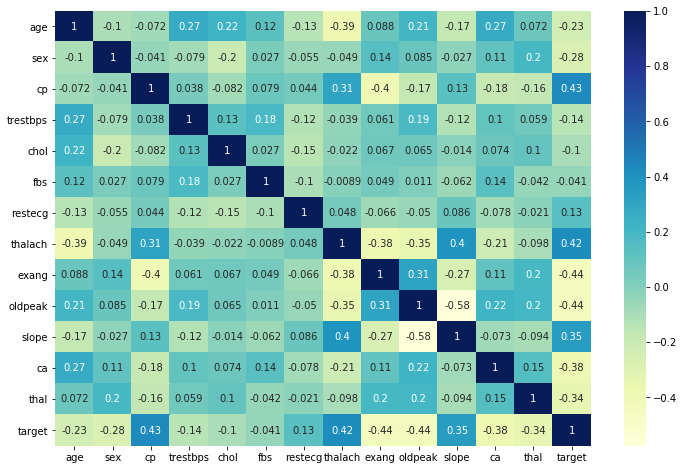

In [3]:
display(df.info())
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu');

In [4]:
df_features = df.drop(columns=['target'])
df_target = df['target']
df_features.values

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [5]:
x = StandardScaler().fit_transform(df_features)
y = df_target.values
x

array([[-0.26843658,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542, ..., -2.24367514,
        -0.73197147,  1.08985168],
       ...,
       [-0.81983438,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459, -0.52212231],
       [-0.4889957 , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.04787747,  0.66150409, -0.91575542, ..., -0.6241209 ,
         0.23862459,  1.08985168]])

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
x_train.shape, x_test.shape

((717, 13), (308, 13))

## Using PCA y IPCA

In [7]:
def get_scores_pca(pca_function, n_components=range(1,13), **kwargs):
    pca_list = [pca_function(n_components=n_component, **kwargs) for n_component in n_components]
    logistic = LogisticRegression()
    scores_pca = []

    for pca in pca_list:
        x_train_pca = pca.fit_transform(x_train)
        x_test_pca = pca.fit_transform(x_test)

        logistic.fit(x_train_pca, y_train)
        scores_pca.append(logistic.score(x_test_pca, y_test))

    return scores_pca

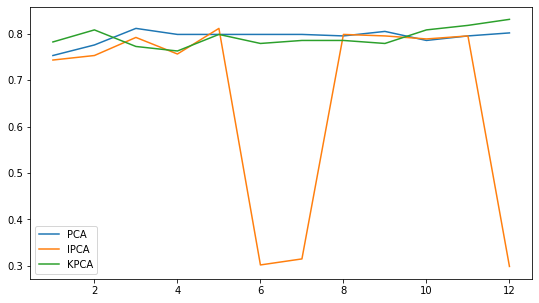

In [8]:
scores_pca = get_scores_pca(decomposition.PCA, random_state=1)
scores_ipca = get_scores_pca(decomposition.IncrementalPCA, batch_size=12)
scores_kpca = get_scores_pca(decomposition.KernelPCA, kernel='poly', random_state=1)

plt.figure(figsize=(9,5))

plt.plot(range(1,13), scores_pca, label='PCA')
plt.plot(range(1,13), scores_ipca, label='IPCA')
plt.plot(range(1,13), scores_kpca, label='KPCA')

plt.legend()
plt.show()

In [9]:
pca = decomposition.PCA(n_components=3, random_state=1)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.fit_transform(x_test)

ipca = decomposition.IncrementalPCA(n_components=5, batch_size=12)
x_train_ipca = ipca.fit_transform(x_train)
x_test_ipca = ipca.fit_transform(x_test)

kpca = decomposition.KernelPCA(n_components=2, kernel='poly', random_state=1)
x_train_kpca = kpca.fit_transform(x_train)
x_test_kpca = kpca.fit_transform(x_test)

display(pca)
display(ipca)
display(kpca)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=1,
    svd_solver='auto', tol=0.0, whiten=False)

IncrementalPCA(batch_size=12, copy=True, n_components=5, whiten=False)

KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
          fit_inverse_transform=False, gamma=None, kernel='poly',
          kernel_params=None, max_iter=None, n_components=2, n_jobs=None,
          random_state=1, remove_zero_eig=False, tol=0)

In [10]:
print(f'Explained Variance: \n{pca.explained_variance_}\n')
print(f'Variance Ratio: \n{pca.explained_variance_ratio_}\n')
print(f'Singular values: \n{pca.singular_values_}\n')
print(f'Noise Variance: \n{pca.noise_variance_}\n')

Explained Variance: 
[2.90868462 1.7128629  1.28861075]

Variance Ratio: 
[0.21745329 0.12805365 0.09633655]

Singular values: 
[29.88253967 22.93139574 19.88978378]

Noise Variance: 
0.7465976721051009



In [11]:
print(f'Explained Variance: \n{ipca.explained_variance_}\n')
print(f'Variance Ratio: \n{ipca.explained_variance_ratio_}\n')
print(f'Singular values: \n{ipca.singular_values_}\n')
print(f'Noise Variance: \n{ipca.noise_variance_}\n')

Explained Variance: 
[2.88749772 1.69738121 1.22297177 1.04883981 0.87613352]

Variance Ratio: 
[0.21586936 0.12689624 0.09142938 0.07841128 0.06549975]

Singular values: 
[29.77350835 22.82752792 19.3765924  17.94418628 16.40039608]

Noise Variance: 
0.015030461447806068



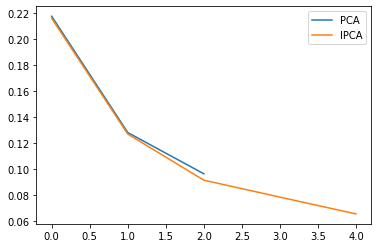

In [12]:
x_axis = range( len (pca.explained_variance_ratio_) )
y_axis = pca.explained_variance_ratio_

plt.plot(x_axis, y_axis, label='PCA')

x_axis = range( len (ipca.explained_variance_ratio_) )
y_axis = ipca.explained_variance_ratio_
plt.plot(x_axis, y_axis, label='IPCA')

plt.legend()

In [13]:
logistic = LogisticRegression()

logistic.fit(x_train, y_train)
'{:.2%}'.format(logistic.score(x_test, y_test))

'80.84%'

Accuracy:  81.17%


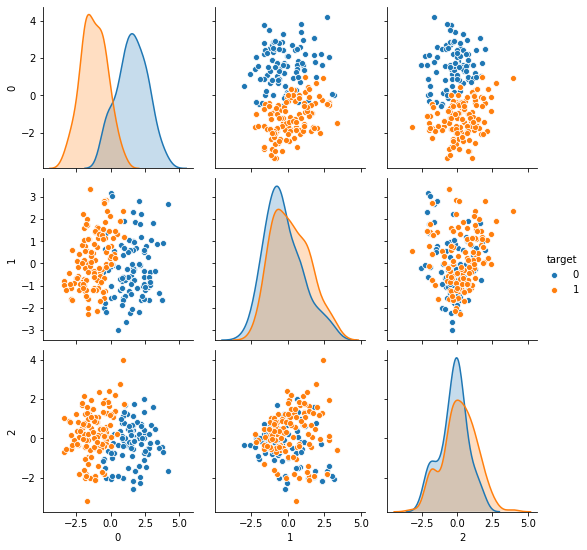

In [14]:
logistic.fit(x_train_pca, y_train)

print('Accuracy:  {:.2%}'.format(logistic.score(x_test_pca, y_test)))

y_hat = logistic.predict(x_test_pca)

predict_graph = pd.DataFrame(x_test_pca)
predict_graph['target'] = y_hat

sns.pairplot(predict_graph, hue='target')

Accuracy:  81.17%


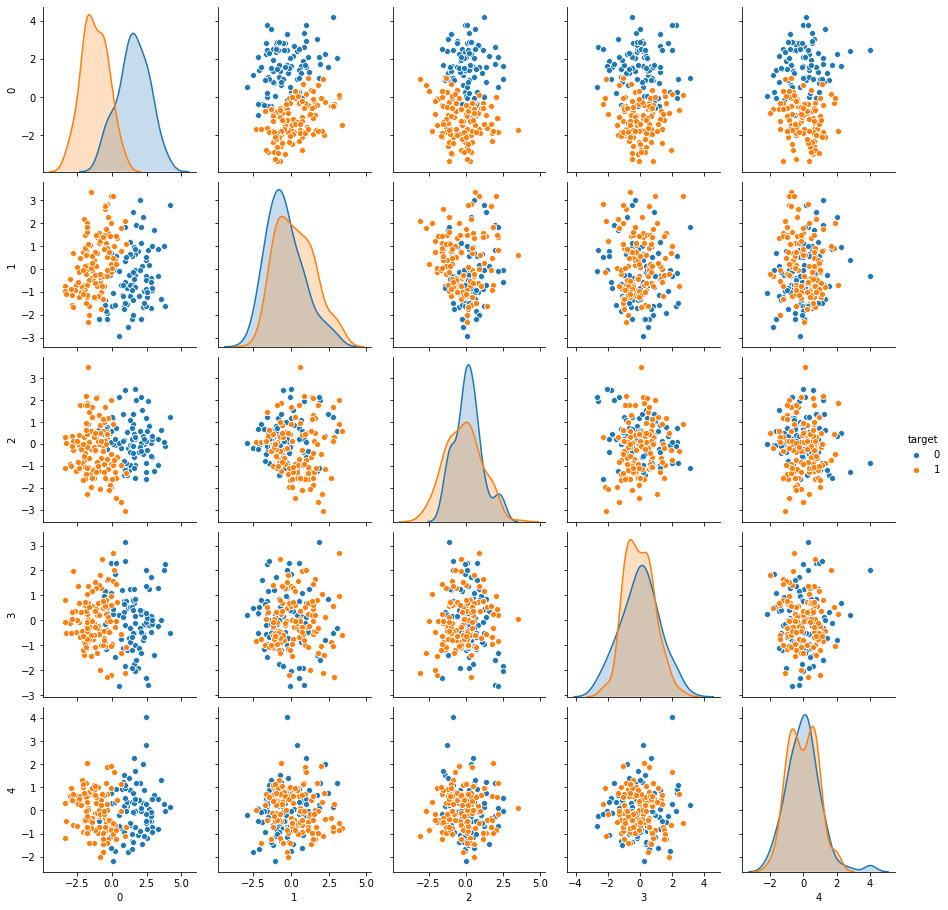

In [15]:
logistic.fit(x_train_ipca, y_train)

print('Accuracy:  {:.2%}'.format(logistic.score(x_test_ipca, y_test)))

y_hat = logistic.predict(x_test_ipca)

predict_graph = pd.DataFrame(x_test_ipca)
predict_graph['target'] = y_hat

sns.pairplot(predict_graph, hue='target')

Accuracy:  80.84%


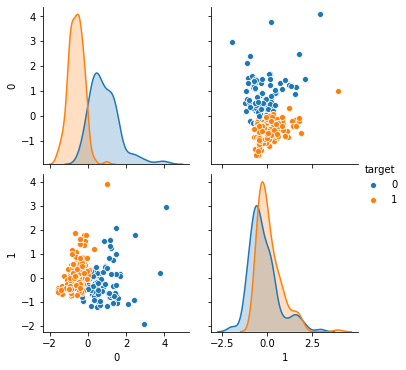

In [16]:
logistic.fit(x_train_kpca, y_train)

print('Accuracy:  {:.2%}'.format(logistic.score(x_test_kpca, y_test)))

y_hat = logistic.predict(x_test_kpca)

predict_graph = pd.DataFrame(x_test_kpca)
predict_graph['target'] = y_hat

sns.pairplot(predict_graph, hue='target')